#### 加载用到的包和数据集

In [2]:
from sklearn import datasets, neighbors, linear_model
from matplotlib import pyplot as plt
import pandas as pd
import math
import numpy as np
%matplotlib inline  

digits = datasets.load_digits()

X_digits = digits.data
y_digits = digits.target

#### 绘出前10个样本

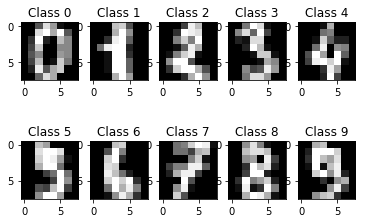

In [2]:
#len(X_digits) 1797
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_digits[i].reshape(8,8), cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_digits[i]))

#### 从图片到特征向量

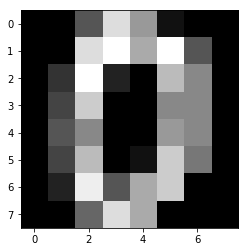

In [3]:
plt.imshow(X_digits[0].reshape(8,8), cmap='gray', interpolation='none')

In [4]:
#8*8 矩阵
pd.DataFrame(X_digits[0].reshape(8,8))

,0,1,2,3,4,5,6,7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0
1,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0
2,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0
3,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0
4,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0
5,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0
6,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0
7,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


In [5]:
# 64维特征向量
print(X_digits[0])
print(X_digits[0].shape)

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
(64,)


#### 计算距离

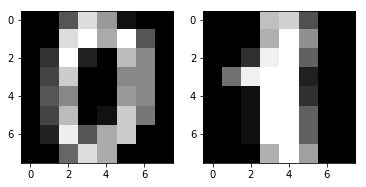

data of pic_a
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
data of pic_b
[  0.   0.   0.   0.  14.  13.   1.   0.   0.   0.   0.   5.  16.  16.   2.
   0.   0.   0.   0.  14.  16.  12.   0.   0.   0.   1.  10.  16.  16.  12.
   0.   0.   0.   3.  12.  14.  16.   9.   0.   0.   0.   0.   0.   5.  16.
  15.   0.   0.   0.   0.   0.   4.  16.  14.   0.   0.   0.   0.   0.   1.
  13.  16.   1.   0.]
距离(循环方式)：  0
距离(向量方式)：  0


In [3]:
#绘图
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(X_digits[i].reshape(8,8), cmap='gray', interpolation='none')
plt.show()

#打印原始数据
pic_a = X_digits[0]
pic_b = X_digits[11]

print('data of pic_a')
print(pic_a)

print('data of pic_b')
print(pic_b)


#计算欧氏距离 pic_a, pic_b, 64维向量

# 循环方式
dis = 0
#########################################
#！！自己动手，用循环方式计算64维向量pic_a和pic_b的欧式距离，结果保存到变量 dis



#########################################
print('距离(循环方式)： ', dis)




#numpy 向量方式计算
dis2 = 0
#########################################
#！！自己动手，用向量方式计算64维向量pic_a和pic_b的欧式距离，结果保存到变量 dis2



#########################################
print('距离(向量方式)： ', dis2)

#### 简化的k-NN

- K = 1
- 训练样本：10
- 测试样本：10


In [7]:
X_train = X_digits[:10]
y_train = y_digits[:10]

X_test = X_digits[10:20]
y_test = y_digits[10:20]

In [8]:
y_train

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

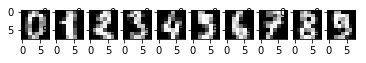

In [9]:
#绘制训练样本
for i, x_train in enumerate(X_train):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train.reshape(8,8), cmap='gray', interpolation='none')
    #plt.title("train {}".format(y_digits[i]))
    
plt.show()

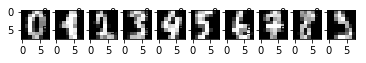

In [10]:
#绘制测试样本
for i, x_test in enumerate(X_test):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test.reshape(8,8), cmap='gray', interpolation='none')
    

In [11]:
dis = np.zeros((10,10))

In [12]:
for i, x_train in enumerate(X_train):
    for j, x_test in enumerate(X_test):
        dis[i, j] = ((x_train - x_test) ** 2).sum() ** 0.5

pd.DataFrame(dis)

,0,1,2,3,4,5,6,7,8,9
0,23.706539,60.423505,51.088159,46.032597,46.754679,54.918121,59.724367,47.349762,46.000000,50.368641
1,54.653454,35.128336,45.110974,46.861498,45.243784,46.357308,41.085277,43.301270,44.598206,52.763624
2,46.797436,42.485292,49.234135,49.467161,50.497525,57.671483,45.000000,43.312816,44.339599,56.240555
3,52.220686,48.682646,44.732538,29.051678,56.098128,49.122296,45.011110,51.215232,44.418465,31.048349
4,44.113490,44.463468,59.883220,56.753854,32.741411,62.896741,41.701319,46.989360,49.050994,54.890801
5,49.719212,47.296934,48.846699,34.885527,53.028294,54.387499,54.451814,49.879856,47.644517,35.256205
6,39.698866,50.388491,46.000000,54.341513,40.841156,51.029403,33.808283,50.179677,49.315312,51.000000
7,53.347915,52.507142,55.839054,49.729267,57.654141,49.152823,60.654761,44.452222,44.988888,62.072538
8,46.978719,49.497475,52.278102,41.255303,47.381431,53.823787,49.598387,47.780749,41.048752,48.497423
9,46.097722,50.931326,52.105662,45.144213,46.850827,55.955339,58.017239,43.577517,49.122296,44.181444


#### k-NN with sickit-learn

In [13]:

from sklearn import datasets, neighbors

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier(n_neighbors=2)
print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.977778


#### 不同k值的预测效果

In [14]:
scores = np.zeros(99)
for n in range(1,100):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    scores[n-1] = knn.fit(X_train, y_train).score(X_test, y_test)

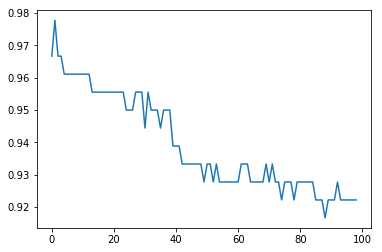

In [15]:
plt.plot(scores)